In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/questions.csv")
df.shape

(404351, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
280181,280181,550806,550807,Why do English clubs have to pay so much more ...,Why do fans spend so much money for their club...,0
352232,352232,689972,689973,What happens to my valid F2 visa if I apply fo...,Are F1 visa holders eligible for entering the ...,0
282035,282035,554401,554402,Cooking soda and baking soda same or not?,Is cooking soda same as baking soda?,1
79415,79415,157761,157762,How can I flirt with girls?,How do I flirt with girl?,1
59017,59017,117399,117400,What does it feel like enlisting in the Marine...,Can you get college credits while in the marines?,0
180801,180801,357101,357102,Why should someone get a verified Quora profile?,How can I get my Quora account verfied?,1
368751,368751,721666,721667,Where can I get ideas for a high school comput...,What are some good high school computer scienc...,1
367599,367599,719459,719460,What is the the best soaps for skin?,Which is the best soap for oily face skin?,0
33306,33306,66381,66382,Can dogs eat grapes?,Why are grapes poisonous to dogs?,0
397427,397427,776555,776556,"Which languages use M, N, R, or L as vowels?",Which languages use w as a vowel?,0


**Basic EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [6]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

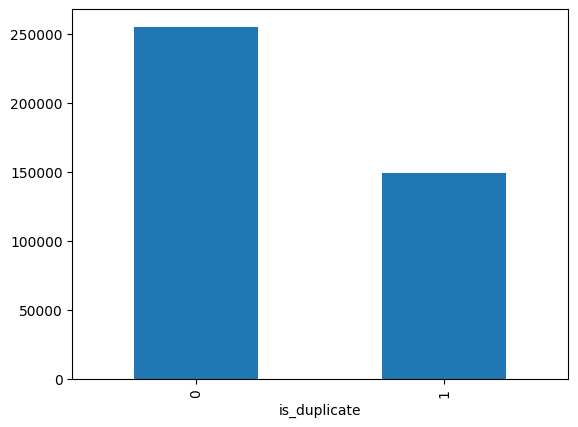

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated Questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].to_list())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


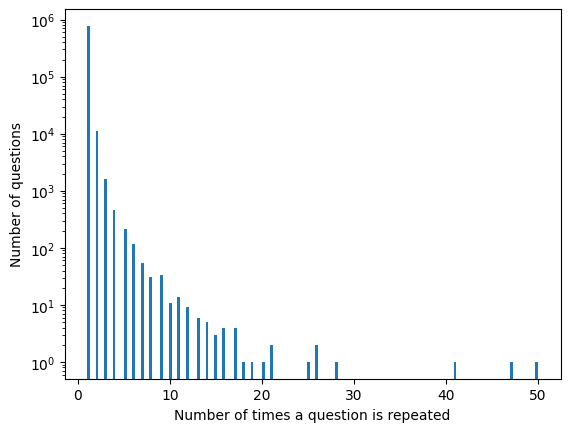

In [9]:
# Repeated questionshistogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.xlabel('Number of times a question is repeated')
plt.ylabel('Number of questions')
plt.show()

**Only BOW**

In [10]:
new_df = df.sample(30000, random_state=2)

In [11]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [12]:
new_df.duplicated().sum()

0

In [13]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [15]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 10000)

In [16]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154198,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [18]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,is_duplicate
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7373333333333333

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7285